## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [ ]:
X.isnull().sum().sum()
object_columns = X.select_dtypes(include=['object']).columns
unique_values_count=X.apply(lambda x: x.unique().shape)
unique_values_count.min().min()
object_columns
#признаков типа 'objet' нет, и минимальное значение уникальных значений- 39, поэтому категорильных признакпризнаков нет


#data.describe(include = 'object') 

Index([], dtype='object')

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [ ]:
from sklearn.model_selection import train_test_split
# using the train test split function
np.random.seed(202)
X_train, X_test, y_train, y_test = train_test_split(
X,y ,test_size=0.30, shuffle=True)




**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
#?KNeighborsClassifier

In [ ]:

scaler = StandardScaler()
neighbors_num=[1,3,5,10,15,25]
X_train_two_features = X_train[['alcohol', 'magnesium']]
X_test_two_features = X_test[['alcohol', 'magnesium']]
X_train_scaled = scaler.fit_transform(X_train_two_features)
X_test_scaled = scaler.fit_transform(X_test_two_features)
print("NN \t Train \t Test")
for k in neighbors_num:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train_scaled, y_train)
  y_predicted_test = clf.predict(X_test_scaled)
  y_predicted_train = clf.predict(X_train_scaled)
  train_acc = np.mean(y_predicted_train==y_train)
  test_acc = np.mean(y_predicted_test==y_test)
  # Вычисляем простейшую метрику качества алгоритма - долю правильных ответов
  print("{} \t {:.2f} \t {:.2f}".format(k, train_acc, test_acc))




NN 	 Train 	 Test
1 	 0.99 	 0.57
3 	 0.84 	 0.57
5 	 0.81 	 0.65
10 	 0.80 	 0.69
15 	 0.77 	 0.65
25 	 0.72 	 0.59


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [ ]:
!pip install mlxtend==0.21.0
#/usr/local/lib/python3.9/dist-packages (0.21.0)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend
mlxtend.__version__

'0.21.0'

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

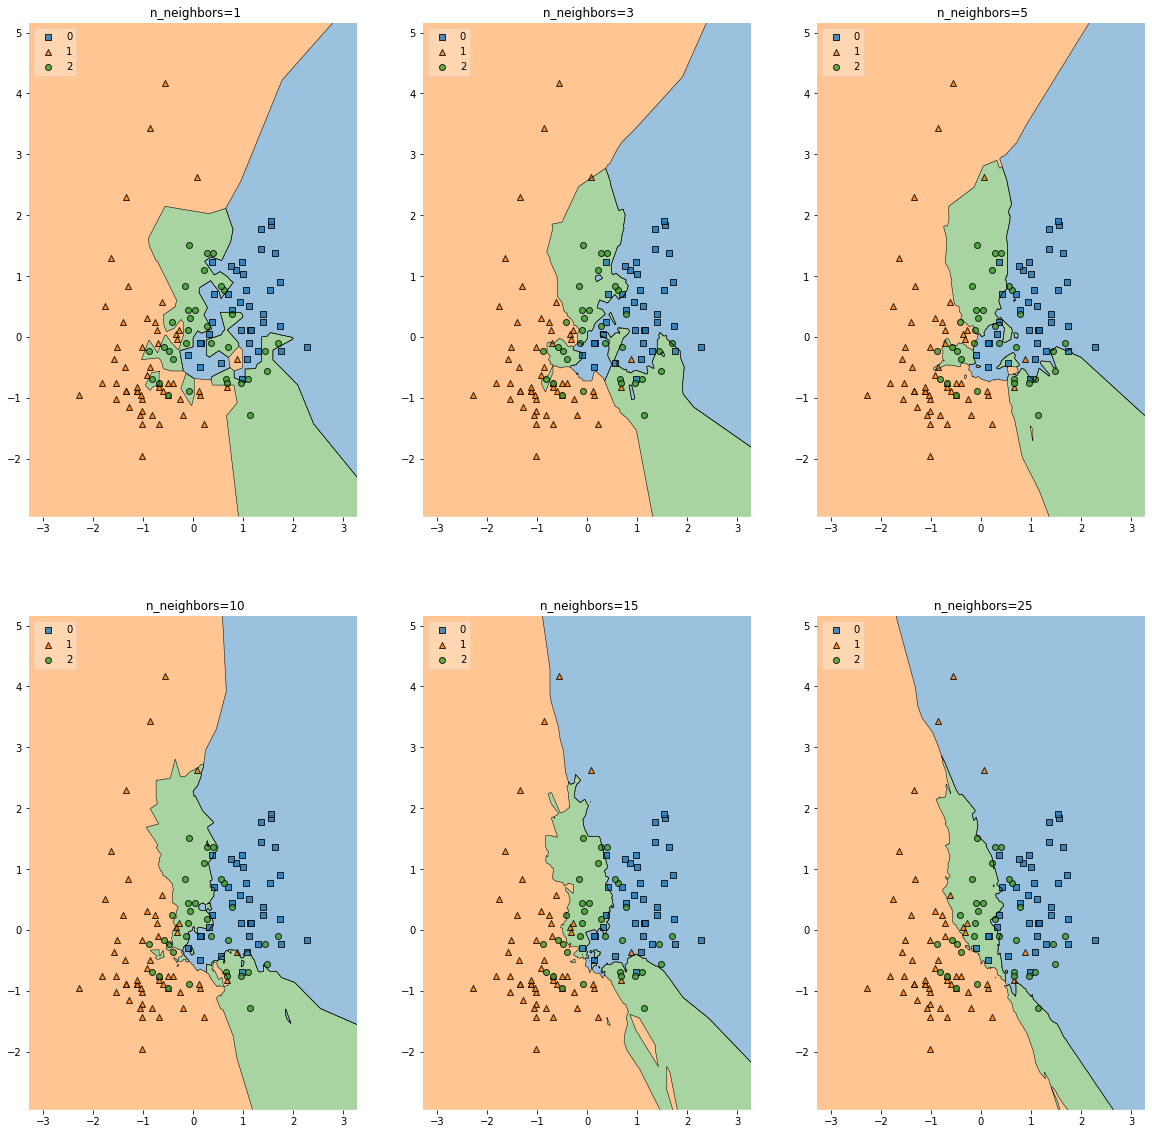

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

clf_values=[]
for k in neighbors_num:
  clf_tmp = KNeighborsClassifier(n_neighbors=k)
  clf_values.append(clf_tmp)

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20,20))

labels = [' n_neighbors=1', ' n_neighbors=3', ' n_neighbors=5', ' n_neighbors=10', ' n_neighbors=15', ' n_neighbors=25']
for clf, lab, grd in zip(clf_values,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X_train_scaled, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
#Если данные линейно разделимы, то достаточно использовать только одного соседа, 
#так как решающая граница будет простой линией, проходящей через точки.
#Если данные имеют сложную нелинейную геометрию, то более оптимально использовать несколько соседей,
#например, 5-15. Таким образом, решающая граница будет более сложной, и классификатор будет
# более устойчивым к выбросам и шуму в данных.
#Однако, если выбрать слишком большое число соседей, то решающая поверхность может стать слишком простой 
#и не сможет хорошо описать границы между классами. Также, слишком большое число соседей может привести к переобучению
# в нашем случае будет оптимально взять 3, так как геометрия не линейная 

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

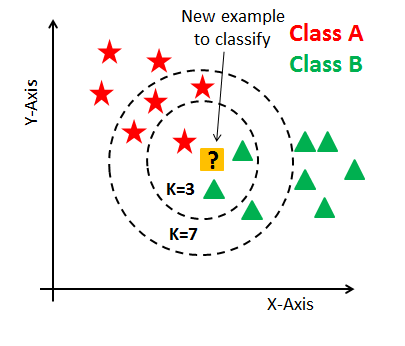

In [ ]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        pass
    
    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            distances = []
            for j in range(len(self.X_train)):
                distance = np.sqrt(np.sum(np.square(X[i]-self.X_train[j])))
                distances.append((distance, self.y_train[j]))
            distances.sort()
            k_nearest_neighbors = [neighbor[1] for neighbor in distances[:self.k]]
            most_common_label = Counter(k_nearest_neighbors).most_common(1)
            y_pred.append(most_common_label[0][0])
        return np.array(y_pred)
        pass


In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
#!pip install kaggle

In [ ]:
#!pip install opendatasets

import opendatasets as od 

#od.download('https://www.kaggle.com/datasets/shivam2503/diamonds')
data = pd.read_csv('/content/diamonds/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [ ]:
data.isnull().sum().sum()
#data.info()

0

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data = data.drop(['Unnamed: 0'],axis=1)

data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
numerical_data = data.select_dtypes(include=[np.number])
target = numerical_data["price"]
numerical_data = numerical_data.drop(columns=["price"])

# Вычислить матрицу корреляций между всеми признаками и целевой переменной
correlation_matrix = numerical_data.corrwith(target)

# Вывести матрицу корреляций
print(correlation_matrix)
#больше всего коррелируют кол-во карат и размер 

carat    0.921591
depth   -0.010647
table    0.127134
x        0.884435
y        0.865421
z        0.861249
dtype: float64


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
unique_values_count=data.apply(lambda x: x.unique().shape)
y = data['price']
data = data.drop(['price'],axis=1)
X = pd.DataFrame(data, columns = data.columns)
X = pd.get_dummies(data, drop_first=True)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
np.random.seed(202)
X_train, X_test, y_train, y_test = train_test_split(
X,y ,test_size=0.30, shuffle=True)


**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
y_test_pred = clf_lr.predict(X_test)
y_train_pred = clf_lr.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print('MSE на тренировочной выборке:', train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print('MSE на тестовой выборке:', test_mse)

MSE на тренировочной выборке: 1294877.814497283
MSE на тестовой выборке: 1237459.72551702


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
clf_lr.coef_
X
#очень сильно влияет число карат, чистота алмаза на несколько порядков больше 

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

# Создание объекта Lasso-регрессии и обучение модели
lasso = Lasso(alpha=10)
lasso.fit(X, y)

# Создание объекта Ridge-регрессии и обучение модели
ridge = Ridge(alpha=10)
ridge.fit(X, y)

# Вывод значений весов
print("Weights for Lasso Regression:", lasso.coef_)
print("Weights for Ridge Regression:", ridge.coef_)

# Проблема мультиколлинеарности возникает в линейной регрессии, когда существует высокая корреляция 
# между двумя или более предикторами(независимыми переменными) модели. Это может привести к 
# неустойчивым оценкам коэффициентов регрессии, значимости коэффициентов и неправильным выводам о важности предикторов.  

Weights for Lasso Regression: [ 9585.58770552  -104.24293794   -51.39702342  -443.36936361
    -0.            -0.            -0.           153.10205369
    74.66662093    83.18798317     0.            -0.
  -118.05763319  -594.90067361  -979.91247151 -1752.84391109
  1322.09768238     0.          -795.59231853   826.76265633
   585.5611749   1174.17514371  1178.54656814]
Weights for Ridge Regression: [11024.95158724   -62.54309929   -27.01216168  -924.10054748
    12.70668587   -48.91205848   598.98369776   856.28514353
   783.56186247   751.99881856  -200.77780106  -264.87413916
  -469.66915987  -965.54929053 -1443.41558992 -2336.26429939
  4915.76971862  3262.27568718  2307.92905911  4170.20846553
  3863.36314399  4594.337224    4540.81830994]


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

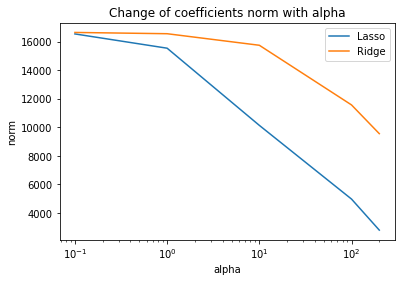

In [ ]:
from sklearn.linear_model import Lasso, Ridge

alpha_num=[0.1, 1, 10, 100, 200]
lasso_norms=[]
ridge_norms=[]
for alpha in alpha_num:
  lasso = Lasso(alpha)
  lasso.fit(X, y)
  lasso_norms.append(np.linalg.norm(lasso.coef_))


  ridge = Ridge(alpha)
  ridge.fit(X, y)
  ridge_norms.append(np.linalg.norm(ridge.coef_))

  
plt.plot(alpha_num, lasso_norms, label='Lasso')
plt.plot(alpha_num, ridge_norms, label='Ridge')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('norm')
plt.title('Change of coefficients norm with alpha')
plt.legend()
plt.show()
  

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [ ]:
from sklearn.linear_model import LassoCV
param_grid = {'alpha': np.logspace(-4, 0, 50)}

# настройка кросс-валидации
cv = LassoCV(cv=5, alphas=alpha_num).fit(X_train_scaled,y_train)

mean_cv=np.mean(cv.mse_path_,axis=0)

# вывод лучшего значения параметра и соответствующей ему оценки MSE
print('Лучшее значение параметра alpha:', cv.alphas_)
print('Соответствующая ему оценка MSE:', mean_cv)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1483389671.2461548, tolerance: 48263149.758660845
  model = cd_fast.enet_coordinate_descent_gram(


Лучшее значение параметра alpha: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
Соответствующая ему оценка MSE: [1540610.81269748 1597757.07243215 1471926.80239191 1634755.95544324
 1697044.43849236]


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
lasso_final = Lasso(alpha=1)
lasso_final.fit(X_train_scaled , y_train)

# вывод коэффициентов и их значений
print('Коэффициенты:', lasso_final.coef_)
#очевидно, что на цену будет влиять количество карат, качество алмаза, а потом размер и остальные параметры
#это легко понять из центр в интернет магазинах. Потому что редкость алмаза определяется не размером а каратами 

Коэффициенты: [5216.93916873  -87.54465475  -59.59579434 -992.6357778     0.
  -35.03011076  161.81303755  409.03267934  329.37838218  301.4462804
  -71.89996215  -91.3579748  -183.0589312  -344.56594515 -431.62797988
 -521.97427586  948.10516901 1561.2670595  1006.19882716 1627.8675925
 1787.19409935 1250.80054639 1441.40425261]
Их значения: [5216.93916873  -87.54465475  -59.59579434 -992.6357778     0.
  -35.03011076  161.81303755  409.03267934  329.37838218  301.4462804
  -71.89996215  -91.3579748  -183.0589312  -344.56594515 -431.62797988
 -521.97427586  948.10516901 1561.2670595  1006.19882716 1627.8675925
 1787.19409935 1250.80054639 1441.40425261]


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:

clf = Lasso(alpha=1)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print('MSE на тренировочной выборке:', train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print('MSE на тестовой выборке:', test_mse)
#Выбор лучшей модели для предсказаний зависит от многих факторов, 
#включая тип задачи, доступные данные, количество данных, время обучения и т.д.
#очевидно я выберу Метод регрессии лассо, потому что это вариация линейной регрессии, специально адаптированная для данных, 
#которые демонстрируют сильную мультиколлинеарность (то есть сильную корреляцию признаков друг с другом), как в нашем случае

MSE на тренировочной выборке: 1299846.542451448
MSE на тестовой выборке: 1235682.1461636324
